In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
pi = np.pi

VSUN = np.array([10.0, 11.0, 7.0])

S1 = 26.
S2 = 18.
S3 = 15.
PHI = 2.

NSAMPLES = 100
BOUND = 100.

In [3]:
def schwarzschild_dist(v, s1, s2, s3):
    return np.exp(-(v[0]**2/(2*s1**2) + v[1]**2/(2*s2**2) + v[2]**2/(2*s3**2)))/(s1*s2*s3*(2*pi)**1.5)

def ln_schwarzschild(v, s1, s2, s3):
    return np.log(schwarzschild_dist(v, s1, s2, s3))

def focusing_prob(v, phi):
    return 1. + (42./(np.linalg.norm(v-VSUN) + phi))**2

def ln_focusing(v, phi):
    return np.log(focusing_prob(v, phi))

def ln_pdf(v, s1, s2, s3, phi):
    return ln_focusing(v, phi) + ln_schwarzschild(v, s1, s2, s3)

In [4]:
import itertools

ug, vg, wg = np.linspace(-BOUND, BOUND, NSAMPLES), np.linspace(-BOUND, BOUND, NSAMPLES), \
                                np.linspace(-BOUND, BOUND, NSAMPLES)
vgal = np.array(list(itertools.product(ug, vg, wg)))

In [5]:
prob = np.zeros(len(vgal))

for i, v in enumerate(vgal):
    prob[i] = ln_pdf(v, S1, S2, S3, PHI)

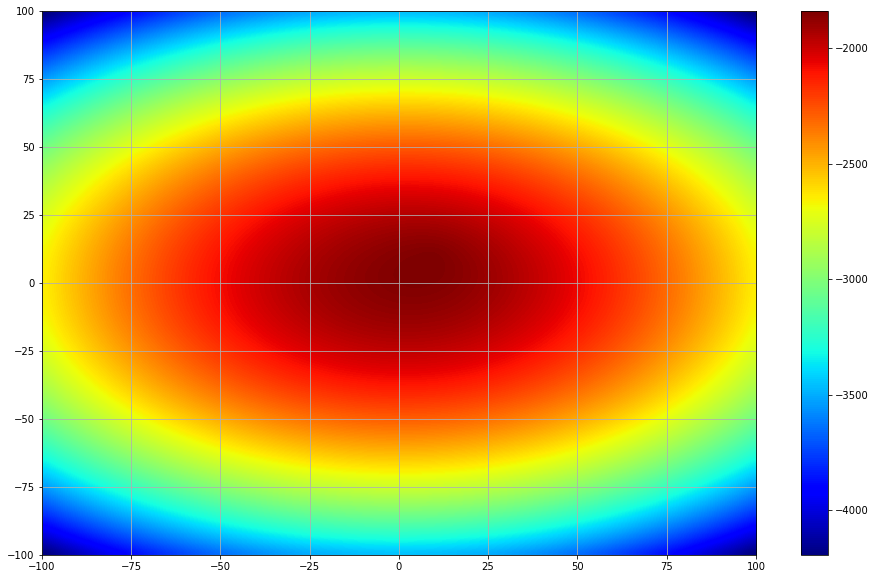

In [20]:
plt.figure(figsize=(16, 10))

h, xedges, yedges = np.histogram2d(vgal[:, 0], vgal[:, 1], bins=100, weights=prob)
plt.imshow(h.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='jet', \
          interpolation='gaussian')
plt.grid(True)
plt.colorbar()
plt.show()

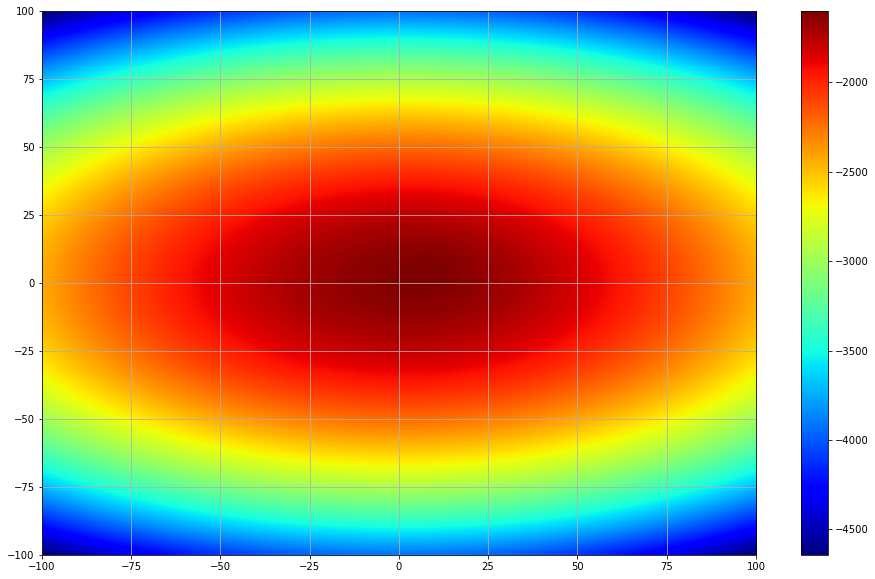

In [11]:
plt.figure(figsize=(16, 10))

h, xedges, yedges = np.histogram2d(vgal[:, 0], vgal[:, 2], bins=100, weights=prob)
plt.imshow(h.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='jet', \
          interpolation='gaussian')
plt.grid(True)
plt.colorbar()
plt.show()